In [26]:
!pip install pandas_datareader

In [2]:
#nativo
from  datetime import datetime

#terceros
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

/home/villacorta/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# ECONOMETRIA FINANCIERA

##  EVALUACION SESION 1

1.1- Descargar y graficar los precios Open, High, Low y Close de la acción (stock) de la acción de
MICROSOFT, analice. Ayuda: El nombre financiero (ticker) de la acción de MICROSOFT es
MSFT.

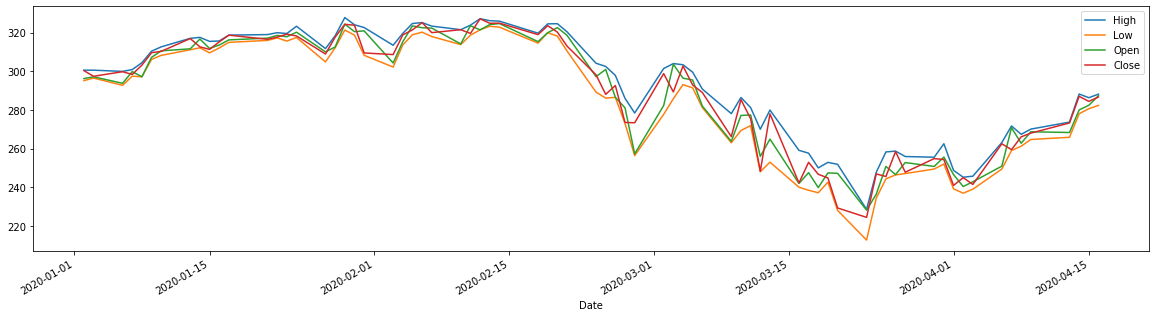

In [3]:
start = datetime(2010, 1, 1)
end = datetime.now()

ticker = "AAPL"
cols_select = ['High', 'Low', 'Open', 'Close']

aapl = web.DataReader(ticker, 'yahoo', start, end)[cols_select]

# Grafico con respecto al año actual para mayor distinción
aapl['2020':].plot(figsize=(20, 5))

ANALISIS: Se aprecia una clara recuperacion que tiende a mantenerse constante, luego de una caida vertiginosa que inició en los primeros días de Marzo y que tuvo su pico mas bajo a fines de ese mismo mes, debido a la coyuntura del COVID-19.

1.2- Descargar y graficar los precios Open, High, Low y Close de la acción (stock) de la acción de
TESLA, extraer y separar solo el precio Close, presentar en dos gráficos separados, a la izquierda
los cuatro precios mencionados y a la derecha el precio Close, analice. Ayuda: El ticker de la
acción de TESLA es TSLA.

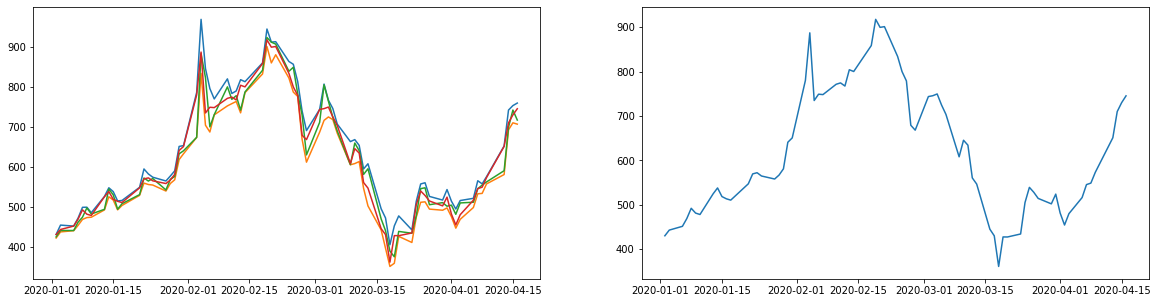

In [4]:
ticker_tesla = 'TSLA'

tsla = web.DataReader(ticker_tesla, 'yahoo', start, end)[cols_select]
only_close = tsla['Close'].copy()


# Grafico con respecto al año actual para mayor distinción
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].plot(tsla['2020':])
axes[1].plot(only_close['2020':])

ANALISIS: Se aprecia una tendencia al alza, luego de una caida vertiginosa que inició a fines de Febrero y que tuvo su pico mas bajo en la quincena de Marzo, así como una recaida a inicios de Abril.

1.3- Descargar la serie de precios de la acción de APLE y transformar la misma serie de precios Close
de la acción de APLE en sus retornos, presentar la gráfica de la serie de precios arriba y la serie
de los retornos abajo, analice.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f60b702e490>,
      dtype=object)

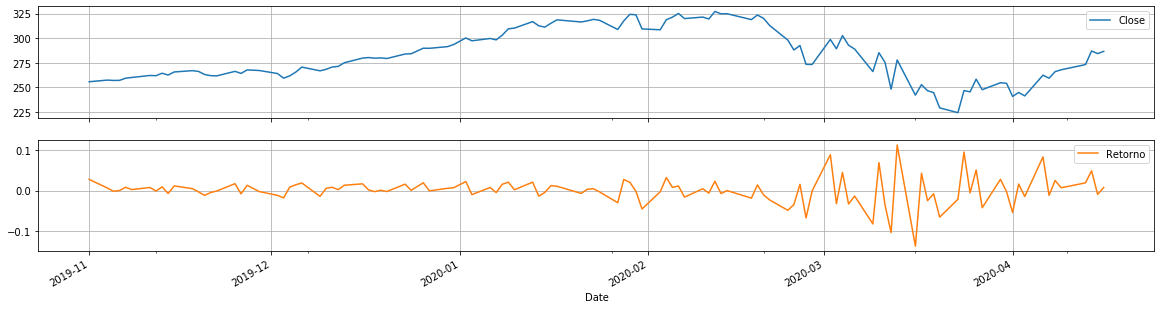

In [16]:
ticker_apple = 'AAPL'

aapl = pd.DataFrame(web.DataReader(ticker_apple, 'yahoo', start, end)['Close'])

aapl['Retorno'] = np.log(aapl['Close']).diff()
#retorno = .dropna()

aapl['2019-11':].plot(subplots=True, figsize=(20, 5), grid=True)

ANALISIS: Podemos ver que la gráfica de retorno no posee un comportamiento estacional, ya que su media no esta centrada en 0. Lueo de ello el precio de cierre posee una tendencia al alza.